# IPO 데이터

## 필요한 라이브러리 설치

In [1]:
# 패키지 출력
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
pd.options.display.float_format = '{:.6f}'.format

## IPO 데이터 불러오기

In [3]:
# 한글 설정
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rc('font', family='NanumBarunGothic')
mpl.rc('axes', unicode_minus=False)

In [4]:
# train 데이터 프레임 불러오고 출력하기
df = pd.read_excel("C:/Users/Edward/Desktop/IPO 원본데이터(2019 2020 2021).xlsx")
df.head(5)

넘버    기업명         상장일 시장구분  매출액(백만원)  순이익(백만원)   최대주주지분율  자본금(백만원)  \
0   1   웹케시   2019.01.25  코스닥     77086      3679 22.000000      3381   
1   2   노랑풍선  2019.01.30  코스닥     83822     10436 26.000000      2382   
2   3  이노테라피  2019.02.01  코스닥       180     -3012 28.000000      2484   
3   4     천보  2019.02.11  코스닥     87606     14822 46.000000      5000   
4   5    셀리드  2019.02.20  코스닥         0     -5408 23.000000      4105   

     상장주식수    구주매출비율  ... 주간사규모순위  주간사규모더미(1: 대형)  기관청약경쟁률  일반청약경쟁률  의무보유확약비율  \
0   970000  0.000000  ...       8               1      614      947  6.800000   
1  1000000 26.440000  ...       2               1      978     1025 12.420000   
2   500000  0.000000  ...       9               2      154      463  2.830000   
3  2500000 20.000000  ...       8               1      891      426 15.800000   
4  1200000  0.000000  ...       3               1      778      818 10.490000   

   유통가능물량(비율)  공모금액(백만원)  공모가(원)       시초가  종속변수  
0   60.240000      25220   26000 21.920000     0  
1   27.720000      20000   20000 51.750000     0  
2   48.350000       9000   18000 23.330000     0  
3   35.680000     100000   40000 31.250000     0  
4   48.060000      39600   33000 32.580000     0  

[5 rows x 21 columns]

우선 데이터 EDA를 진행하고 데이터 분석시에 다시 데이터셋을 분할

-------------------------------------------------------------------------------------------------

In [5]:
#train과 test 분항
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3, random_state=1206)

In [6]:
""" train = df """

' train = df '

-----------------------------

In [7]:
train.head(5)

넘버      기업명         상장일 시장구분  매출액(백만원)  순이익(백만원)   최대주주지분율  자본금(백만원)  \
98    99    이오플로우  2020.09.14  코스닥         0     -9389 21.750000      1113   
169  170      맥스트  2021.07.27  코스닥      1983     -8921 32.940000      4266   
47    48      라파스  2019.11.11  코스닥      9725     -3657 25.840000      4095   
107  108  미코바이오메드  2020.10.22  코스닥      4098    -13172 39.970000      8358   
54    55      노터스  2019.11.27  코스닥     36308      3747 48.790000         7   

       상장주식수   구주매출비율  ... 주간사규모순위  주간사규모더미(1: 대형)  기관청약경쟁률  일반청약경쟁률  \
98   1400000 0.000000  ...       8               1      150      686   
169  1000000 0.000000  ...       8               1     1587     6762   
47   1600000 0.000000  ...      15               3      202      813   
107  2500000 0.000000  ...       5               1      159       41   
54    500000 0.000000  ...       9               2      699       22   

     의무보유확약비율  유통가능물량(비율)  공모금액(백만원)  공모가(원)        시초가  종속변수  
98  25.520000   57.000000      26600   19000  14.470000     0  
169 81.350000   34.190000      15000   15000 100.000000     1  
47   0.000000   59.210000      32000   20000  -0.250000     0  
107  0.020000   62.030000      37500   15000   7.330000     0  
54   0.590000   36.250000      10000   20000  48.750000     0  

[5 rows x 21 columns]

In [8]:
train.shape

(142, 21)

In [9]:
test.head(5)

넘버   기업명         상장일 시장구분  매출액(백만원)  순이익(백만원)   최대주주지분율  자본금(백만원)  \
167  168   오비고  2021.07.13  코스닥     10229     -5332 30.390000      5641   
111  112   소룩스  2020.11.06  코스닥     71108      5794 26.100000       815   
192  193  지니너스  2021.11.08  코스닥      3794     -9152 37.410000      5434   
83    84  솔트룩스  2020.07.23  코스닥     15335       145 16.620000      2515   
72    73   엔피디  2020.03.16  코스닥    259266      8574 64.080000     10767   

       상장주식수    구주매출비율  ... 주간사규모순위  주간사규모더미(1: 대형)  기관청약경쟁률  일반청약경쟁률  \
167  2211820  0.000000  ...       4               1     1123     1485   
111  1973670 17.930000  ...       1               1     1135     1660   
192  2000000  0.000000  ...       9               2       66      162   
83    750000  0.000000  ...       2               1      528      953   
72   7550000  0.000000  ...      10               2      307       32   

     의무보유확약비율  유통가능물량(비율)  공모금액(백만원)  공모가(원)        시초가  종속변수  
167 24.770000   50.520000      31629   14300  34.270000     0  
111  2.550000   24.320000      19737   10000 100.000000     1  
192  1.710000   31.740000      40000   20000 -10.000000     0  
83   5.580000   40.640000      18750   25000  60.000000     0  
72   8.780000   34.810000      40770    5400 -10.000000     0  

[5 rows x 21 columns]

In [10]:
test.shape

(62, 21)

In [11]:
# 모델 적용 일관성을 위해, train과 test를 합친 combine 생성
combine = [train,test]

### 변수확인

In [12]:
print(train.columns.values)

['넘버' '기업명' '상장일' '시장구분' '매출액(백만원)' '순이익(백만원)' '최대주주지분율' '자본금(백만원)'
 '상장주식수' '구주매출비율' '주간사 명' '주간사규모순위' '주간사규모더미(1: 대형)' '기관청약경쟁률' '일반청약경쟁률'
 '의무보유확약비율' '유통가능물량(비율)' '공모금액(백만원)' '공모가(원)' '시초가' '종속변수']


### 변수설명

|변수|설명|
|------|---|
|넘버|ID|
|기업명|IPO 신청 기업명|
|상장일|상장일자|
|시장구분|시장구분(코스닥)|
|매출액(백만원)|매출액(백만원)|
|순이익(백만원)|순이익(백만원)|
|최대주주지분율|최대주주가 가진 주식 비율|
|자본금(백만원)|자본금(백만원)|
|상장주식수|상장한 주식 갯수|
|구주매출비율|기존 주주의 구주 매출 비율|
|주간사 명|채권 발행 시, 대표로 일을 처리하는 기관명|
|주간사규모순위|주간사의 규모 순위(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16)|
|주간사규모더미(1: 대형)|주간사 규모별로 3분위 한 더미데이터(1 = 대형, 2 = 중형, 3 = 소형)|
|기관청약경쟁률|기관의 수요예측 경쟁률|
|일반청약경쟁률|일반인의 수요예측 경쟁률|
|의무보유확약비율|일정기간 주식을 팔지않고 가지고 있는 주식의 비율|
|유통가능물량(비율)||
|공모금액(백만원)||
|공모가(원)||
|시초가||
|종속변수||

### 데이터 확인

In [13]:
train.head()

넘버      기업명         상장일 시장구분  매출액(백만원)  순이익(백만원)   최대주주지분율  자본금(백만원)  \
98    99    이오플로우  2020.09.14  코스닥         0     -9389 21.750000      1113   
169  170      맥스트  2021.07.27  코스닥      1983     -8921 32.940000      4266   
47    48      라파스  2019.11.11  코스닥      9725     -3657 25.840000      4095   
107  108  미코바이오메드  2020.10.22  코스닥      4098    -13172 39.970000      8358   
54    55      노터스  2019.11.27  코스닥     36308      3747 48.790000         7   

       상장주식수   구주매출비율  ... 주간사규모순위  주간사규모더미(1: 대형)  기관청약경쟁률  일반청약경쟁률  \
98   1400000 0.000000  ...       8               1      150      686   
169  1000000 0.000000  ...       8               1     1587     6762   
47   1600000 0.000000  ...      15               3      202      813   
107  2500000 0.000000  ...       5               1      159       41   
54    500000 0.000000  ...       9               2      699       22   

     의무보유확약비율  유통가능물량(비율)  공모금액(백만원)  공모가(원)        시초가  종속변수  
98  25.520000   57.000000      26600   19000  14.470000     0  
169 81.350000   34.190000      15000   15000 100.000000     1  
47   0.000000   59.210000      32000   20000  -0.250000     0  
107  0.020000   62.030000      37500   15000   7.330000     0  
54   0.590000   36.250000      10000   20000  48.750000     0  

[5 rows x 21 columns]

In [14]:
train.tail()

넘버      기업명         상장일 시장구분  매출액(백만원)  순이익(백만원)   최대주주지분율  자본금(백만원)  \
5      6   에코프로비엠  2019.03.05  코스닥    289870     15159 69.000000      9925   
112  113    네패스아크  2020.11.17  코스닥     54719      4653 70.370000      5252   
46    47  아이티엠반도체  2019.11.07  코스닥    228237     18159 67.560000     11411   
65    66    위세아이텍  2020.02.10  코스닥     16549      1505 28.610000      2146   
118  119     엔에프씨  2020.12.02  코스닥     32860      6527 51.310000       917   

       상장주식수   구주매출비율  ... 주간사규모순위  주간사규모더미(1: 대형)  기관청약경쟁률  일반청약경쟁률  \
5    3000000 0.000000  ...       9               2      988      273   
112  2340400 0.000000  ...       1               1      707      830   
46   5050000 8.710000  ...       5               1     1078      321   
65    850000 0.000000  ...      11               2     1105     1076   
118  2000000 0.000000  ...       3               1      979      643   

     의무보유확약비율  유통가능물량(비율)  공모금액(백만원)  공모가(원)       시초가  종속변수  
5   45.040000   40.070000     144000   48000 27.290000     0  
112  1.600000   29.630000      62021   26500 36.600000     0  
46  15.800000   30.270000     131300   26000  2.880000     0  
65   6.950000   58.270000      10200   12000 15.830000     0  
118 18.520000   38.040000      26800   13400 54.480000     0  

[5 rows x 21 columns]

### 데이터 정보

In [15]:
# 훈련 셋 정보
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 98 to 118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   넘버              142 non-null    int64  
 1   기업명             142 non-null    object 
 2   상장일             142 non-null    object 
 3   시장구분            142 non-null    object 
 4   매출액(백만원)        142 non-null    int64  
 5   순이익(백만원)        142 non-null    int64  
 6   최대주주지분율         142 non-null    float64
 7   자본금(백만원)        142 non-null    int64  
 8   상장주식수           142 non-null    int64  
 9   구주매출비율          142 non-null    float64
 10  주간사 명           142 non-null    object 
 11  주간사규모순위         142 non-null    int64  
 12  주간사규모더미(1: 대형)  142 non-null    int64  
 13  기관청약경쟁률         142 non-null    int64  
 14  일반청약경쟁률         142 non-null    int64  
 15  의무보유확약비율        142 non-null    float64
 16  유통가능물량(비율)      142 non-null    float64
 17  공모금액(백만원)       142 non-null    in

In [16]:
# 검증 셋 정보
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 167 to 22
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   넘버              62 non-null     int64  
 1   기업명             62 non-null     object 
 2   상장일             62 non-null     object 
 3   시장구분            62 non-null     object 
 4   매출액(백만원)        62 non-null     int64  
 5   순이익(백만원)        62 non-null     int64  
 6   최대주주지분율         62 non-null     float64
 7   자본금(백만원)        62 non-null     int64  
 8   상장주식수           62 non-null     int64  
 9   구주매출비율          62 non-null     float64
 10  주간사 명           62 non-null     object 
 11  주간사규모순위         62 non-null     int64  
 12  주간사규모더미(1: 대형)  62 non-null     int64  
 13  기관청약경쟁률         62 non-null     int64  
 14  일반청약경쟁률         62 non-null     int64  
 15  의무보유확약비율        62 non-null     float64
 16  유통가능물량(비율)      62 non-null     float64
 17  공모금액(백만원)       62 non-null     int

In [17]:
# 훈련 자료 int, float 변수 통계치
train.describe()

넘버      매출액(백만원)      순이익(백만원)    최대주주지분율     자본금(백만원)  \
count 142.000000    142.000000    142.000000 142.000000   142.000000   
mean  104.542254  46869.838028     48.908451  42.116620  5436.676056   
std    59.899990  68459.120976  14096.756526  15.522943  6402.725168   
min     2.000000      0.000000 -63811.000000   0.000000     7.000000   
25%    51.250000   9476.750000  -2624.500000  31.012500  2316.250000   
50%   105.500000  24494.000000   2277.500000  40.495000  3930.500000   
75%   157.750000  54891.500000   5474.250000  53.820000  5807.750000   
max   204.000000 515289.000000  67061.000000  74.500000 50000.000000   

                상장주식수     구주매출비율    주간사규모순위  주간사규모더미(1: 대형)     기관청약경쟁률  \
count      142.000000 142.000000 142.000000      142.000000  142.000000   
mean   2239115.697183   9.612606   4.816901        1.253521  925.676056   
std    2557419.146236  16.290231   3.977989        0.551421  579.416416   
min     320000.000000   0.000000   1.000000        1.000000   10.000000   
25%    1000000.000000   0.000000   2.000000        1.000000  334.500000   
50%    1561165.000000   0.000000   4.000000        1.000000 1088.500000   
75%    2356975.000000  19.985000   7.000000        1.000000 1392.250000   
max   20000000.000000  74.960000  16.000000        3.000000 2142.000000   

          일반청약경쟁률   의무보유확약비율  유통가능물량(비율)     공모금액(백만원)       공모가(원)  \
count  142.000000 142.000000  142.000000    142.000000   142.000000   
mean   985.436620  17.204930   39.122817  40327.915493 19888.028169   
std    967.394383  19.509168   12.741625  62391.828625 13777.851135   
min      1.000000   0.000000    0.000000   7000.000000  3100.000000   
25%    241.500000   2.740000   29.315000  15856.000000 11000.000000   
50%    813.500000  10.280000   37.910000  25384.500000 15350.000000   
75%   1478.500000  25.402500   47.255000  40623.000000 25000.000000   
max   6762.000000  83.510000   73.770000 596903.000000 75400.000000   

             시초가       종속변수  
count 142.000000 142.000000  
mean   45.430211   0.295775  
std    41.769647   0.458006  
min   -10.000000   0.000000  
25%     6.265000   0.000000  
50%    36.635000   0.000000  
75%   100.000000   1.000000  
max   100.000000   1.000000

주간사규모순위와 주간사규모더미(1: 대형)은 범주로 잡혀야하나 수치로 잡힘 변환해줄 필요있음

In [18]:
for dataset in combine:
    dataset['주간사규모순위'] = dataset['주간사규모순위'].astype(object)    

for dataset in combine:
    dataset['주간사규모더미(1: 대형)'] = dataset['주간사규모더미(1: 대형)'].astype(object)
    
for dataset in combine:
    dataset['상장주식수'] = dataset['상장주식수'].astype(int)

In [19]:
# 훈련 자료 object 변수 통계치
train.describe(include=['O'])

기업명         상장일 시장구분 주간사 명  주간사규모순위  주간사규모더미(1: 대형)
count     142         142  142   142      142             142
unique    142         133    1    15       14               3
top     이오플로우  2019.11.20  코스닥  한국투자        2               1
freq        1           2  142    32       32             114

주간사 최빈값은 "한국투자증권"  
  
주간사 명과 주간사 규모의 unique가 불일치한다. 그 이유는 주간사명에 KB증권이 "KB"와 "KB증권"이라는 2개의 값을 가지기 때문이다.

In [20]:
train['시장구분'].unique()

array(['코스닥'], dtype=object)

random_state에 따라 array(['코스닥'], dtype=object)나 array(['코스닥', '코스닥 '], dtype=object)

으로 나오는데 이따끔 코스닥의 분류가 공백으로 인해 2개로 나뉘나 "시장구분"열은 어차피 전부 코스닥으로 동일함으로 제거

In [21]:
print("Before", train.shape, test.shape)

train = train.drop(['시장구분'], axis=1)
test = test.drop(['시장구분'], axis=1)
combine = [train, test]

print("After", train.shape, test.shape)

Before (142, 21) (62, 21)
After (142, 20) (62, 20)


In [22]:
lead_mapping = {'미래에셋': '미래에셋', '한국투자': '한국투자', '삼성': '삼성', 'NH투자': 'NH투자', 'KB': 'KB증권', 'KB증권': 'KB증권', '신한금융투자': '신한금융투자', '키움': '키움', '하나금융투자': '하나금융투자', '대신': '대신', '유안타': '유안타', '교보': '교보', '신영': '신영', '하이투자': '하이투자', '유진투자': '유진투자', 'DB금융투자': 'DB금융투자', 'IBK투자': 'IBK투자', }
for dataset in combine:
    dataset['주간사 명'] = dataset['주간사 명'].map(lead_mapping)

train.head()

넘버      기업명         상장일  매출액(백만원)  순이익(백만원)   최대주주지분율  자본금(백만원)  \
98    99    이오플로우  2020.09.14         0     -9389 21.750000      1113   
169  170      맥스트  2021.07.27      1983     -8921 32.940000      4266   
47    48      라파스  2019.11.11      9725     -3657 25.840000      4095   
107  108  미코바이오메드  2020.10.22      4098    -13172 39.970000      8358   
54    55      노터스  2019.11.27     36308      3747 48.790000         7   

       상장주식수   구주매출비율   주간사 명 주간사규모순위 주간사규모더미(1: 대형)  기관청약경쟁률  일반청약경쟁률  \
98   1400000 0.000000  하나금융투자       8              1      150      686   
169  1000000 0.000000  하나금융투자       8              1     1587     6762   
47   1600000 0.000000  DB금융투자      15              3      202      813   
107  2500000 0.000000    KB증권       5              1      159       41   
54    500000 0.000000      대신       9              2      699       22   

     의무보유확약비율  유통가능물량(비율)  공모금액(백만원)  공모가(원)        시초가  종속변수  
98  25.520000   57.000000      26600   19000  14.470000     0  
169 81.350000   34.190000      15000   15000 100.000000     1  
47   0.000000   59.210000      32000   20000  -0.250000     0  
107  0.020000   62.030000      37500   15000   7.330000     0  
54   0.590000   36.250000      10000   20000  48.750000     0

In [23]:
# 변경 후 훈련 자료 int, float 변수 통계치
train.describe()

넘버      매출액(백만원)      순이익(백만원)    최대주주지분율     자본금(백만원)  \
count 142.000000    142.000000    142.000000 142.000000   142.000000   
mean  104.542254  46869.838028     48.908451  42.116620  5436.676056   
std    59.899990  68459.120976  14096.756526  15.522943  6402.725168   
min     2.000000      0.000000 -63811.000000   0.000000     7.000000   
25%    51.250000   9476.750000  -2624.500000  31.012500  2316.250000   
50%   105.500000  24494.000000   2277.500000  40.495000  3930.500000   
75%   157.750000  54891.500000   5474.250000  53.820000  5807.750000   
max   204.000000 515289.000000  67061.000000  74.500000 50000.000000   

                상장주식수     구주매출비율     기관청약경쟁률     일반청약경쟁률   의무보유확약비율  \
count      142.000000 142.000000  142.000000  142.000000 142.000000   
mean   2239115.697183   9.612606  925.676056  985.436620  17.204930   
std    2557419.146236  16.290231  579.416416  967.394383  19.509168   
min     320000.000000   0.000000   10.000000    1.000000   0.000000   
25%    1000000.000000   0.000000  334.500000  241.500000   2.740000   
50%    1561165.000000   0.000000 1088.500000  813.500000  10.280000   
75%    2356975.000000  19.985000 1392.250000 1478.500000  25.402500   
max   20000000.000000  74.960000 2142.000000 6762.000000  83.510000   

       유통가능물량(비율)     공모금액(백만원)       공모가(원)        시초가       종속변수  
count  142.000000    142.000000   142.000000 142.000000 142.000000  
mean    39.122817  40327.915493 19888.028169  45.430211   0.295775  
std     12.741625  62391.828625 13777.851135  41.769647   0.458006  
min      0.000000   7000.000000  3100.000000 -10.000000   0.000000  
25%     29.315000  15856.000000 11000.000000   6.265000   0.000000  
50%     37.910000  25384.500000 15350.000000  36.635000   0.000000  
75%     47.255000  40623.000000 25000.000000 100.000000   1.000000  
max     73.770000 596903.000000 75400.000000 100.000000   1.000000

In [24]:
# 변경 후 훈련 자료 object 변수 통계치
train.describe(include=['O'])

기업명         상장일 주간사 명  주간사규모순위  주간사규모더미(1: 대형)
count     142         142   142      142             142
unique    142         133    14       14               3
top     이오플로우  2019.11.20  한국투자        2               1
freq        1           2    32       32             114

## EDA

### 범주형

#### 주간사별 달성율

In [25]:
train[['주간사 명', '종속변수']].groupby(['주간사 명'], as_index=False).mean().sort_values(by='종속변수', ascending=False)

주간사 명     종속변수
8       신영 0.750000
12  하나금융투자 0.571429
9   신한금융투자 0.500000
13    한국투자 0.343750
11      키움 0.285714
6     미래에셋 0.275862
1    IBK투자 0.250000
7       삼성 0.222222
3     NH투자 0.214286
2     KB증권 0.200000
5       대신 0.200000
0   DB금융투자 0.000000
4       교보 0.000000
10    유진투자 0.000000

In [26]:
train[['주간사규모순위', '종속변수']].groupby(['주간사규모순위'], as_index=False).mean().sort_values(by='종속변수', ascending=False)

주간사규모순위     종속변수
10       12 0.750000
7         8 0.571429
5         6 0.500000
1         2 0.343750
6         7 0.285714
0         1 0.275862
13       16 0.250000
2         3 0.222222
3         4 0.214286
4         5 0.200000
8         9 0.200000
9        11 0.000000
11       14 0.000000
12       15 0.000000

두 변수는 어차피 동일하게 대응하는 값을 가짐으로 "주간사규모순위"변수만 사용  
DB금융투자와 교보 그리고 유진투자는 달성율이 0% 이므로 수치범주형으로 변환해 범주값을 나누어준다.

In [27]:
lead_mapping = {1: 2, 2: 2, 3: 1, 4: 1, 5: 1, 6: 3, 7: 2, 8: 3, 9: 1, 11: 0, 12: 3, 14: 0, 15: 0, 16: 2}
for dataset in combine:
    dataset['주간사성과'] = dataset['주간사규모순위'].map(lead_mapping)

train.head()

넘버      기업명         상장일  매출액(백만원)  순이익(백만원)   최대주주지분율  자본금(백만원)  \
98    99    이오플로우  2020.09.14         0     -9389 21.750000      1113   
169  170      맥스트  2021.07.27      1983     -8921 32.940000      4266   
47    48      라파스  2019.11.11      9725     -3657 25.840000      4095   
107  108  미코바이오메드  2020.10.22      4098    -13172 39.970000      8358   
54    55      노터스  2019.11.27     36308      3747 48.790000         7   

       상장주식수   구주매출비율   주간사 명  ... 주간사규모더미(1: 대형) 기관청약경쟁률  일반청약경쟁률  의무보유확약비율  \
98   1400000 0.000000  하나금융투자  ...              1     150      686 25.520000   
169  1000000 0.000000  하나금융투자  ...              1    1587     6762 81.350000   
47   1600000 0.000000  DB금융투자  ...              3     202      813  0.000000   
107  2500000 0.000000    KB증권  ...              1     159       41  0.020000   
54    500000 0.000000      대신  ...              2     699       22  0.590000   

     유통가능물량(비율)  공모금액(백만원)  공모가(원)        시초가  종속변수  주간사성과  
98    57.000000      26600   19000  14.470000     0      3  
169   34.190000      15000   15000 100.000000     1      3  
47    59.210000      32000   20000  -0.250000     0      0  
107   62.030000      37500   15000   7.330000     0      1  
54    36.250000      10000   20000  48.750000     0      1  

[5 rows x 21 columns]

In [28]:
print("Before", train.shape, test.shape)

train = train.drop(['주간사 명'], axis=1)
test = test.drop(['주간사 명'], axis=1)
combine = [train, test]

print("After", train.shape, test.shape)

Before (142, 21) (62, 21)
After (142, 20) (62, 20)


#### 주간사 규모별 달성율

In [29]:
train[['주간사규모더미(1: 대형)', '종속변수']].groupby(['주간사규모더미(1: 대형)'], as_index=False).mean().sort_values(by='종속변수', ascending=False)

주간사규모더미(1: 대형)     종속변수
0               1 0.307018
1               2 0.300000
2               3 0.125000

규모가 클수록 달성율이 높게 나타남

### 수치형

c:\Users\Edward\anaconda3\envs\py\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

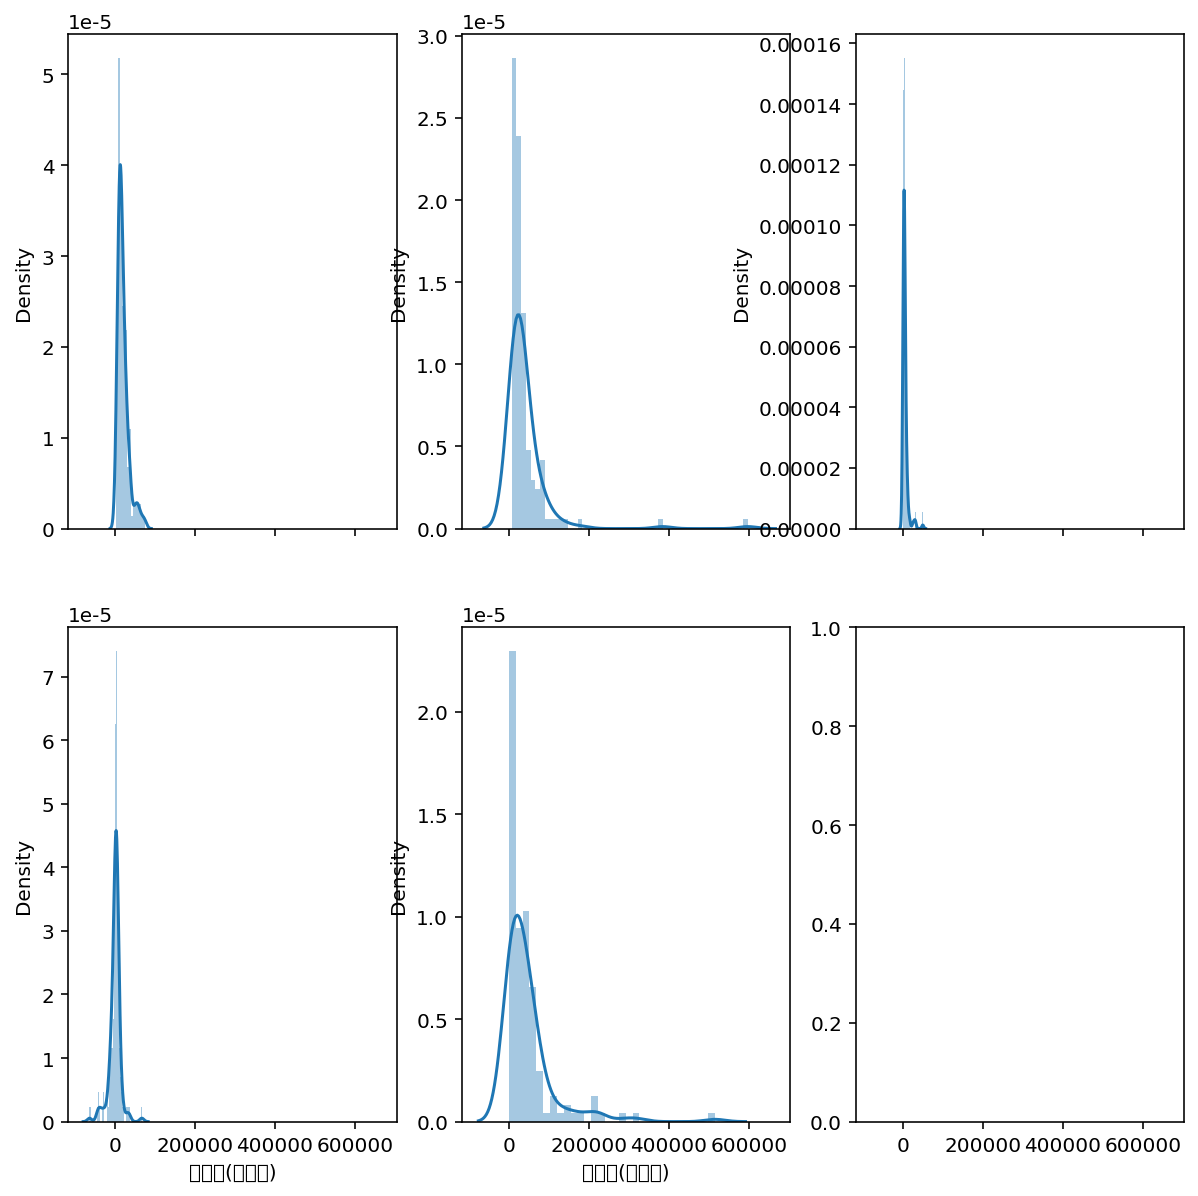

In [30]:
var_dict = {'매출액(백만원)', '순이익(백만원)', '자본금(백만원)', '공모금액(백만원)', '공모가(원)'}

f, ax = plt.subplots(2, 3, figsize=(10,10), sharex=True)

i = [0, 0, 0, 1, 1, 1, 2, 2, 2]
j = [0, 1, 2, 0, 1, 2, 0, 1, 2]

for var, i, j in zip(var_dict, i, j):
    sbn.distplot(train[var], ax=ax[i,j])
   
plt.show()

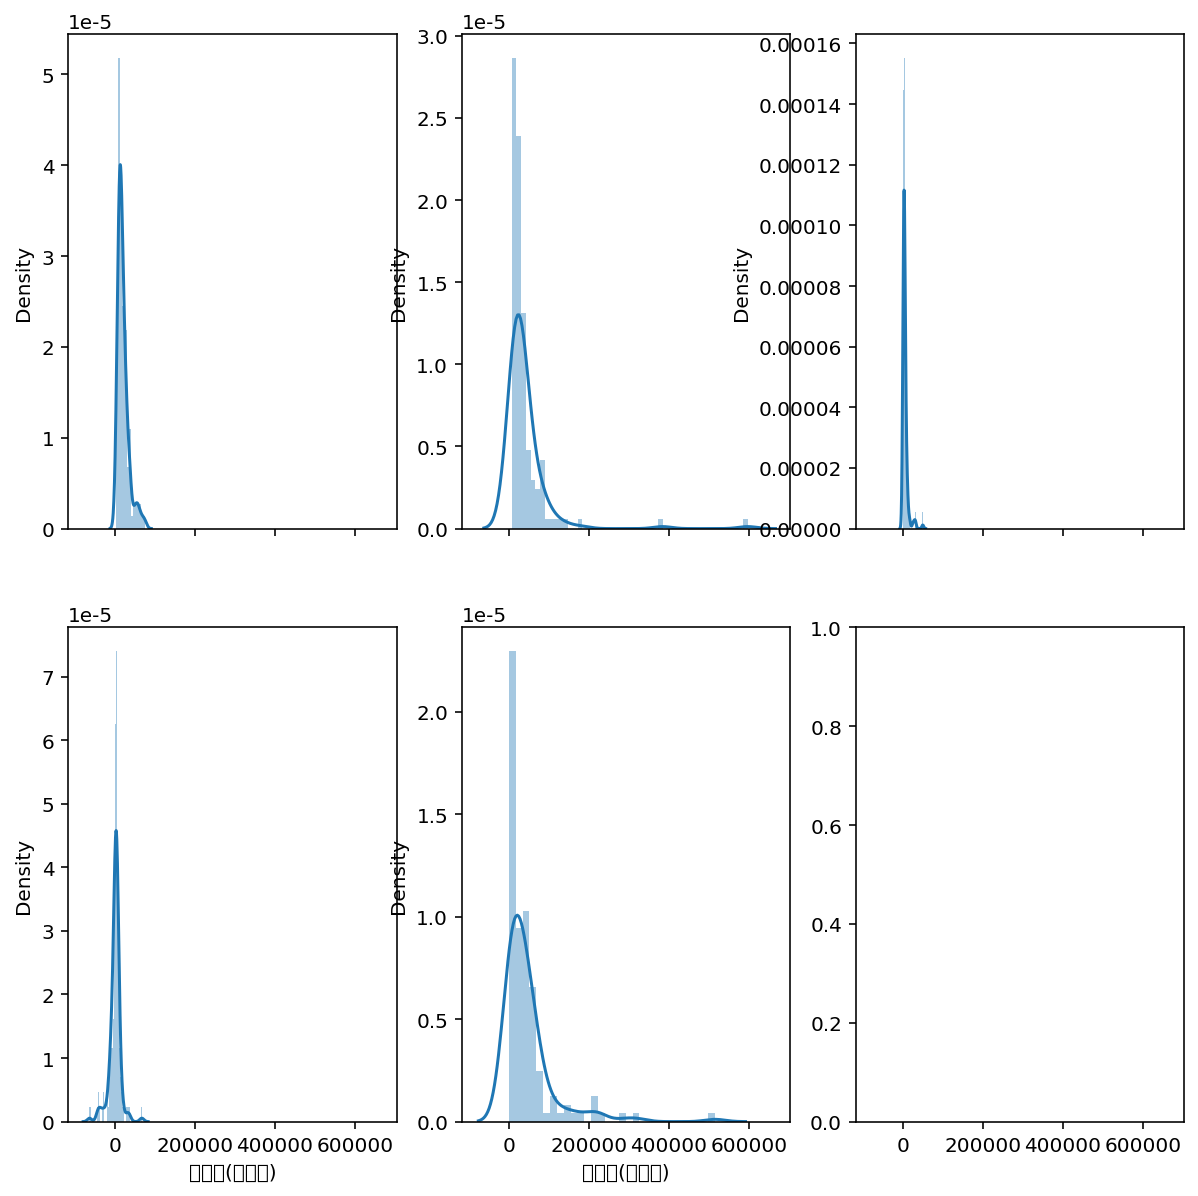

In [31]:
f

In [32]:
ax

array([[<AxesSubplot:xlabel='공모가(원)', ylabel='Density'>,
        <AxesSubplot:xlabel='공모금액(백만원)', ylabel='Density'>,
        <AxesSubplot:xlabel='자본금(백만원)', ylabel='Density'>],
       [<AxesSubplot:xlabel='순이익(백만원)', ylabel='Density'>,
        <AxesSubplot:xlabel='매출액(백만원)', ylabel='Density'>,
        <AxesSubplot:>]], dtype=object)

<AxesSubplot:xlabel='상장주식수', ylabel='Count'>

c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_fig

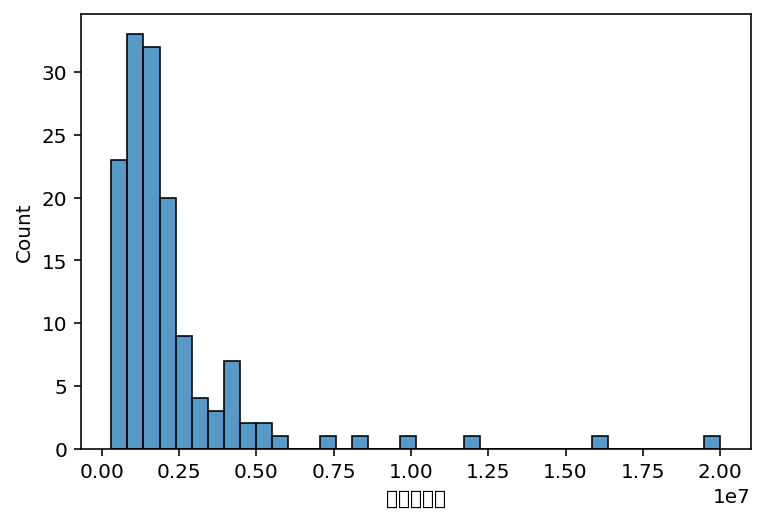

In [33]:
sbn.histplot(data=train, x='상장주식수')

#### 로그 변환

In [34]:
for dataset in combine:
    dataset['매출액로그'] = dataset['매출액(백만원)'].map(np.log)

for dataset in combine:
    dataset['순이익로그'] = dataset['순이익(백만원)'].map(np.log)

for dataset in combine:
    dataset['자본금로그'] = dataset['자본금(백만원)'].map(np.log)

for dataset in combine:
    dataset['상장주식수로그'] = dataset['상장주식수'].map(np.log)

for dataset in combine:
    dataset['공모금액로그'] = dataset['공모금액(백만원)'].map(np.log)
    
for dataset in combine:
    dataset['공모가로그'] = dataset['공모가(원)'].map(np.log)

c:\Users\Edward\anaconda3\envs\py\lib\site-packages\pandas\core\base.py:880: RuntimeWarning: divide by zero encountered in log
  new_values = map_f(values, mapper)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\pandas\core\base.py:880: RuntimeWarning: divide by zero encountered in log
  new_values = map_f(values, mapper)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\pandas\core\base.py:880: RuntimeWarning: invalid value encountered in log
  new_values = map_f(values, mapper)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\pandas\core\base.py:880: RuntimeWarning: invalid value encountered in log
  new_values = map_f(values, mapper)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\pandas\core\base.py:880: RuntimeWarning: divide by zero encountered in log
  new_values = map_f(values, mapper)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\pandas\core\base.py:880: RuntimeWarning: divide by zero encountered in log
  new_values = map_f(values, mapper)


#### 주간사 규모, 매출액별 달성율

<AxesSubplot:xlabel='주간사규모더미(1: 대형)', ylabel='매출액(백만원)'>

c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44508 (\N{HANGUL SYLLABLE GYU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from current font.
  fig.canvas.print_figure

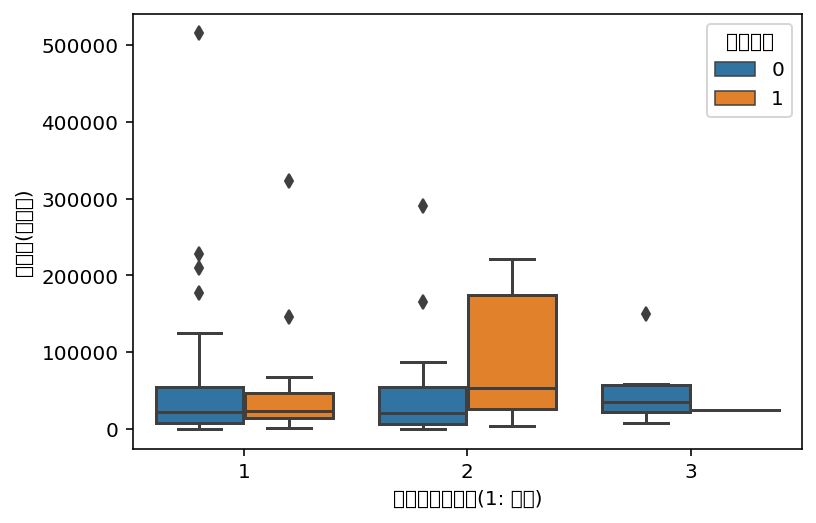

In [35]:
sbn.boxplot(data=train, x='주간사규모더미(1: 대형)', y='매출액(백만원)', hue='종속변수')

<AxesSubplot:xlabel='주간사규모더미(1: 대형)', ylabel='매출액로그'>

c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44508 (\N{HANGUL SYLLABLE GYU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from current font.
  fig.canvas.print_figure

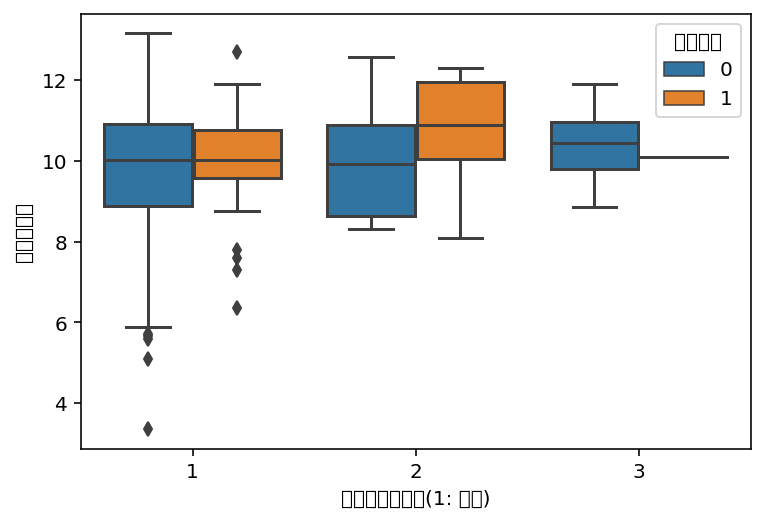

In [36]:
sbn.boxplot(data=train, x='주간사규모더미(1: 대형)', y='매출액로그', hue='종속변수')

#### 주간사 규모, 순이익별 달성율

<AxesSubplot:xlabel='주간사규모더미(1: 대형)', ylabel='순이익(백만원)'>

c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44508 (\N{HANGUL SYLLABLE GYU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from current font.
  fig.canvas.print_figure

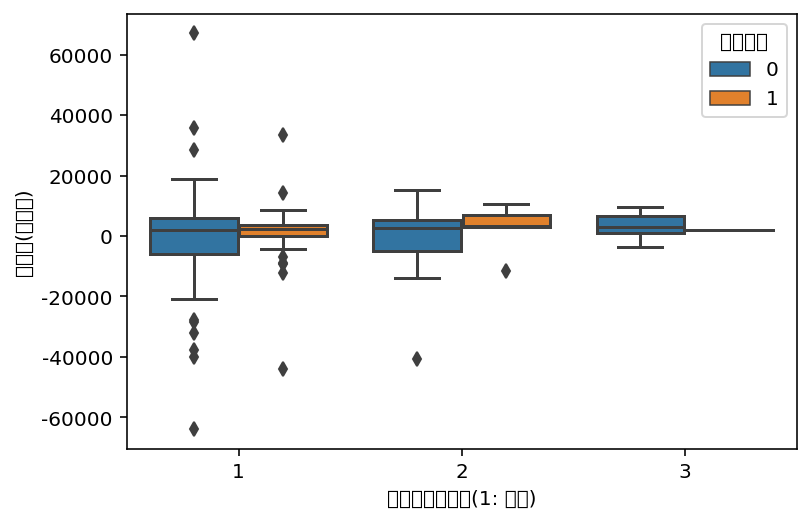

In [37]:
sbn.boxplot(data=train, x='주간사규모더미(1: 대형)', y='순이익(백만원)', hue='종속변수')

<AxesSubplot:xlabel='주간사규모더미(1: 대형)', ylabel='순이익로그'>

c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44508 (\N{HANGUL SYLLABLE GYU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from current font.
  fig.canvas.print_figure

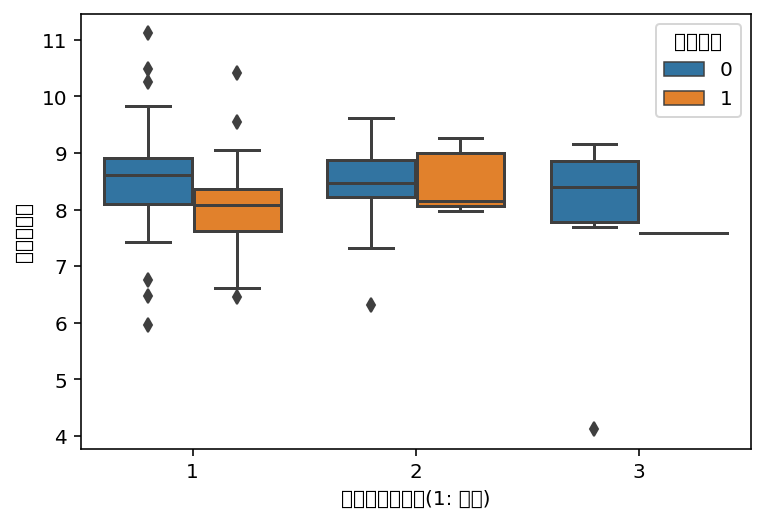

In [38]:
sbn.boxplot(data=train, x='주간사규모더미(1: 대형)', y='순이익로그', hue='종속변수')

#### 주간사 규모, 자본금별 달성율

In [39]:
sbn.boxplot(data=train, x='주간사규모더미(1: 대형)', y='자본금(백만원)', hue='종속변수')

<AxesSubplot:xlabel='주간사규모더미(1: 대형)', ylabel='자본금(백만원)'>

c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44508 (\N{HANGUL SYLLABLE GYU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from current font.
  fig.canvas.print_figure

<AxesSubplot:xlabel='주간사규모더미(1: 대형)', ylabel='자본금로그'>

c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44508 (\N{HANGUL SYLLABLE GYU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from current font.
  fig.canvas.print_figure

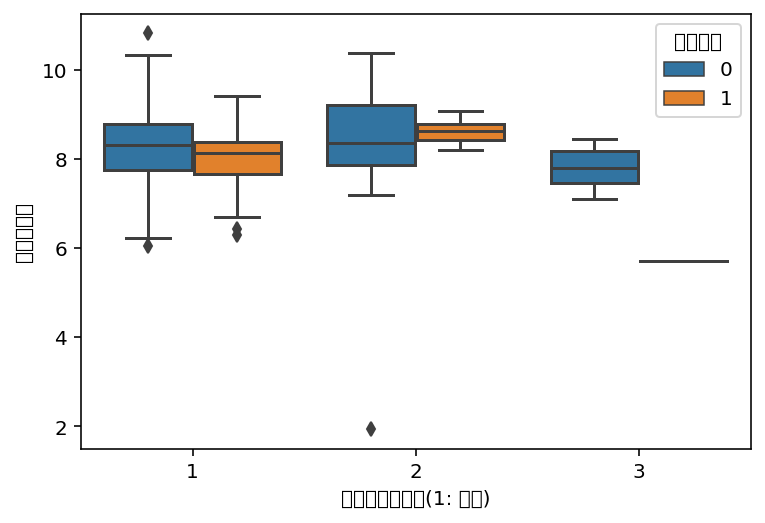

In [40]:
sbn.boxplot(data=train, x='주간사규모더미(1: 대형)', y='자본금로그', hue='종속변수')

#### 주간사 규모, 상장주식수별 달성율

<AxesSubplot:xlabel='주간사규모더미(1: 대형)', ylabel='상장주식수'>

c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44508 (\N{HANGUL SYLLABLE GYU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from current font.
  fig.canvas.print_figure

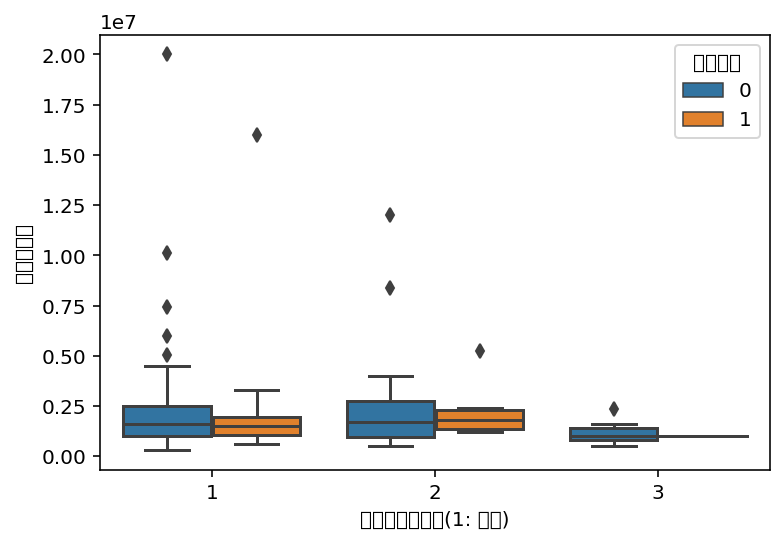

In [41]:
sbn.boxplot(data=train, x='주간사규모더미(1: 대형)', y='상장주식수', hue='종속변수')

<AxesSubplot:xlabel='주간사규모더미(1: 대형)', ylabel='상장주식수로그'>

c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44508 (\N{HANGUL SYLLABLE GYU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from current font.
  fig.canvas.print_figure

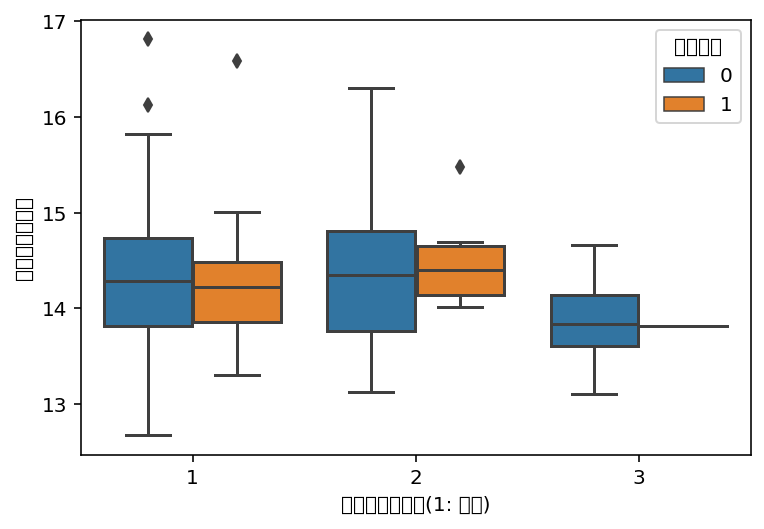

In [42]:
sbn.boxplot(data=train, x='주간사규모더미(1: 대형)', y='상장주식수로그', hue='종속변수')

#### 주간사 규모, 공모금액별 달성율

<AxesSubplot:xlabel='주간사규모더미(1: 대형)', ylabel='공모금액(백만원)'>

c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44508 (\N{HANGUL SYLLABLE GYU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from current font.
  fig.canvas.print_figure

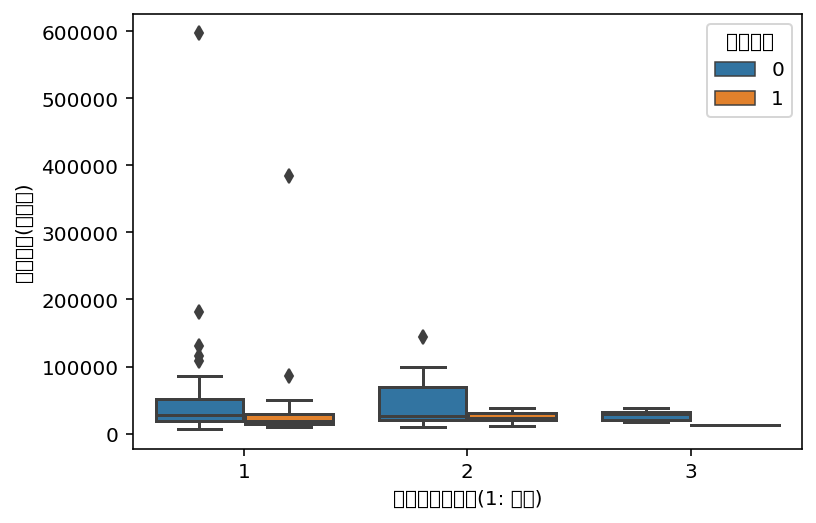

In [43]:
sbn.boxplot(data=train, x='주간사규모더미(1: 대형)', y='공모금액(백만원)', hue='종속변수')

<AxesSubplot:xlabel='주간사규모더미(1: 대형)', ylabel='공모금액로그'>

c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44508 (\N{HANGUL SYLLABLE GYU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from current font.
  fig.canvas.print_figure

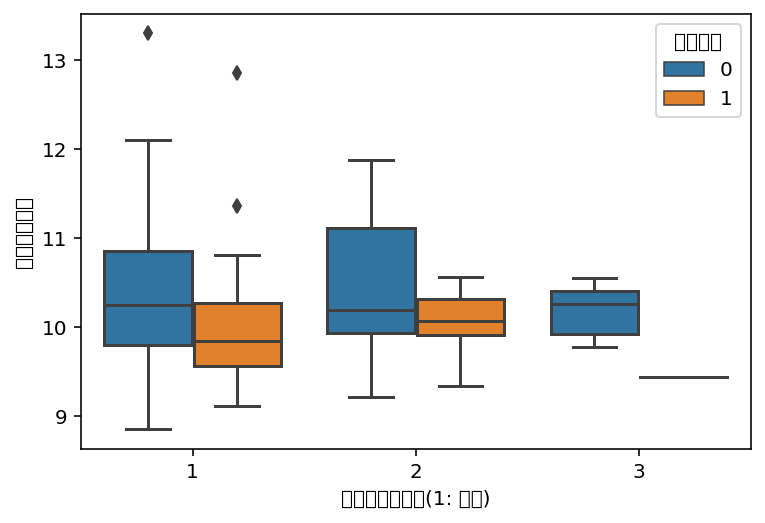

In [44]:
sbn.boxplot(data=train, x='주간사규모더미(1: 대형)', y='공모금액로그', hue='종속변수')

<AxesSubplot:xlabel='주간사규모더미(1: 대형)', ylabel='구주매출비율'>

c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44508 (\N{HANGUL SYLLABLE GYU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from current font.
  fig.canvas.print_figure

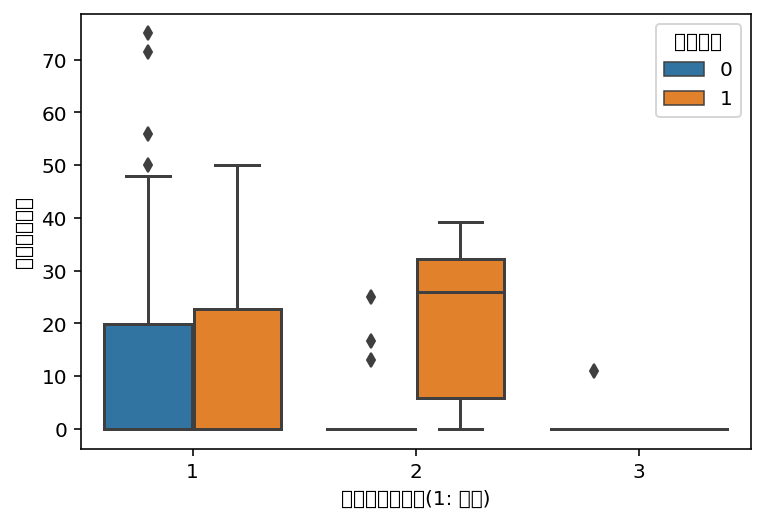

In [45]:
sbn.boxplot(data=train, x='주간사규모더미(1: 대형)', y='구주매출비율', hue='종속변수')

In [46]:
sbn.boxplot(data=train, x='종속변수', y='매출액로그')

<AxesSubplot:xlabel='종속변수', ylabel='매출액로그'>

c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49549 (\N{HANGUL SYLLABLE SOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print_f

In [47]:
sbn.boxplot(data=train, x='종속변수', y='순이익로그')

<AxesSubplot:xlabel='종속변수', ylabel='순이익로그'>

c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49549 (\N{HANGUL SYLLABLE SOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49692 (\N{HANGUL SYLLABLE SUN}) missing from current font.
  fig.canvas.print_f

<AxesSubplot:xlabel='종속변수', ylabel='상장주식수로그'>

c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49549 (\N{HANGUL SYLLABLE SOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_

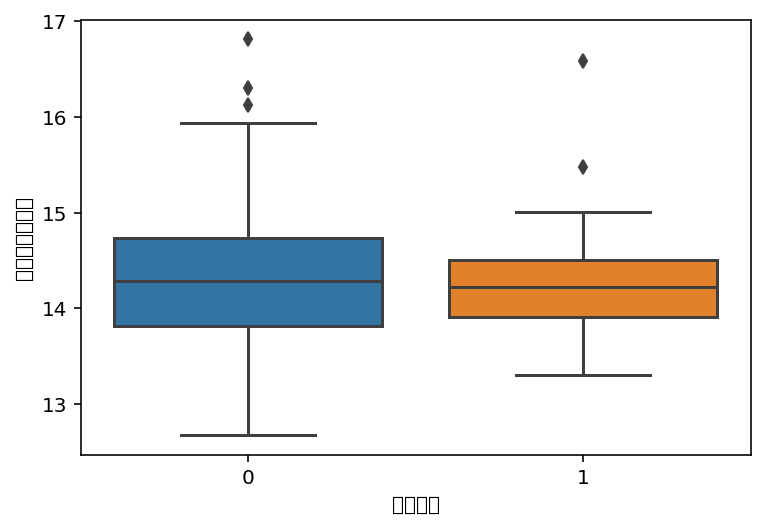

In [48]:
sbn.boxplot(data=train, x='종속변수', y='상장주식수로그')

<AxesSubplot:xlabel='종속변수', ylabel='자본금로그'>

c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49549 (\N{HANGUL SYLLABLE SOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_fi

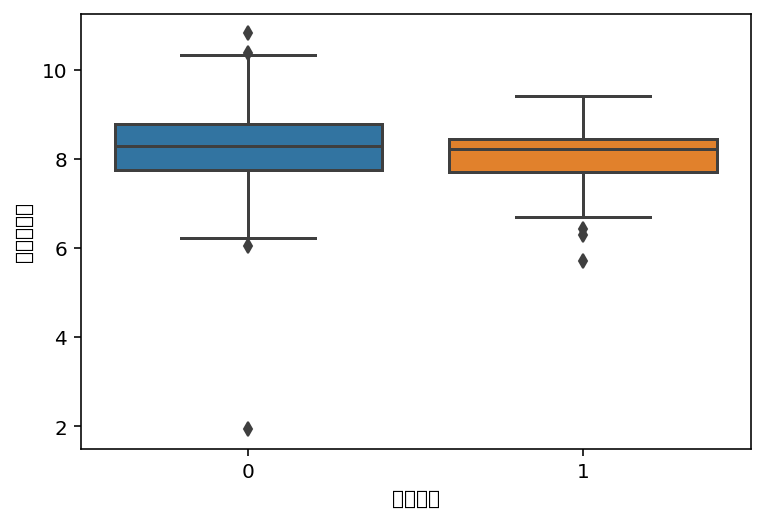

In [49]:
sbn.boxplot(data=train, x='종속변수', y='자본금로그')

<AxesSubplot:xlabel='종속변수', ylabel='공모금액로그'>

c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49549 (\N{HANGUL SYLLABLE SOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from current font.
  fig.canvas.print_

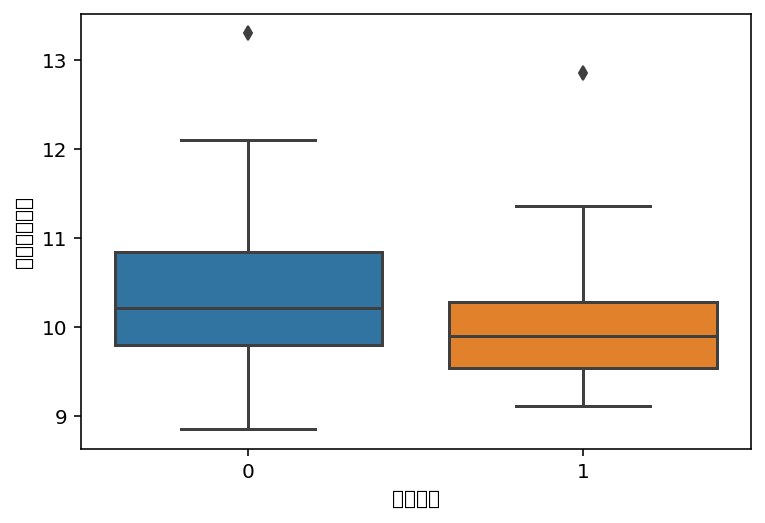

In [50]:
sbn.boxplot(data=train, x='종속변수', y='공모금액로그')